In [6]:
import io

import geomagio
from obspy.core import UTCDateTime

import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
input_factory = geomagio.edge.EdgeFactory()
timeseries = input_factory.get_timeseries(
    observatory = 'HAD',
    channels = ('H', 'E', 'Z', 'F'),
    type = 'variation',
    interval = 'minute',
    starttime = UTCDateTime('2016-03-20T00:00:00Z'),
    endtime = UTCDateTime('2016-03-20T23:59:00Z'))

my_str = io.StringIO("")

output_factory = geomagio.imfjson.IMFJSONWriter()
output_factory.write(
    channels = ('H', 'E', 'Z', 'F'),
    out = my_str,
    timeseries = timeseries)

read_wave_server_v returned flag FL - requested data left (earlier) than tank contents


In [8]:
my_str = my_str.getvalue()
my_dict= json.loads(my_str[2:-1])
bou = pd.DataFrame({"times": my_dict["times"],
                    "H": my_dict["values"][0]["values"],
                    "E": my_dict["values"][1]["values"],
                    "Z": my_dict["values"][2]["values"],
                    "F": my_dict["values"][3]["values"]})
bou["times"] = pd.to_datetime(bou["times"])
bou.set_index("times", drop=True, inplace=True)
bou.head()

,H,E,Z,F
times,,,,
2016-03-20 00:00:00,19749.9,-749.7,44357.9,None
2016-03-20 00:01:00,19750.1,-749.7,44357.9,None
2016-03-20 00:02:00,19749.7,-749.7,44357.7,None
2016-03-20 00:03:00,19749.4,-749.4,44357.6,None
2016-03-20 00:04:00,19749.0,-749.3,44357.5,None


In [9]:
bou["F"] = np.linalg.norm(bou.loc[:, ["H", "E", "Z"]], axis=1)

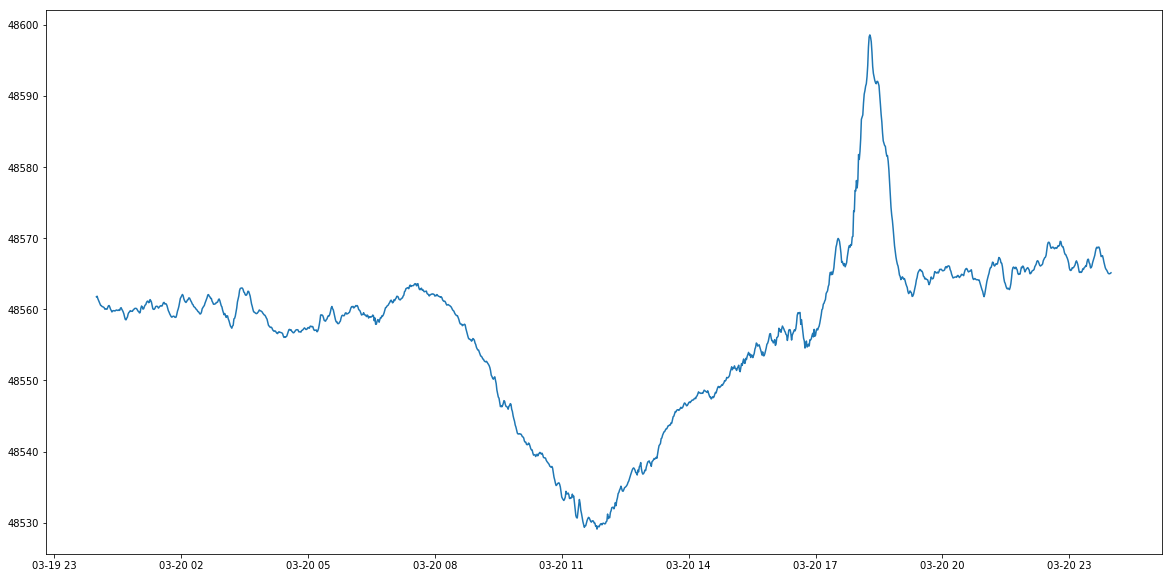

In [10]:
plt.figure(figsize=(20,10))
plt.plot(bou["F"])